This is the notebook for the target model

In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras 
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import layers
from keras import models


In [3]:
#load data and scale it to fit the CNN architecture, also one hot encode the y labels so the classifier will have a better time understamd

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


x_train_images = x_train.reshape((60000, 28, 28, 1))
x_train_images = x_train_images.astype('float32')/255

x_test_images = x_test.reshape((10000, 28, 28, 1))
x_test_images = x_test_images.astype('float32')/255

test_labels = to_categorical(y_test)
train_labels = to_categorical(y_train)


In [4]:
print('x_train: ' + str(x_train_images.shape))
print('y_train: ' + str(train_labels.shape))
print('x_test:  '  + str(x_test_images.shape))
print('y_test:  '  + str(test_labels.shape))

x_train: (60000, 28, 28, 1)
y_train: (60000, 10)
x_test:  (10000, 28, 28, 1)
y_test:  (10000, 10)


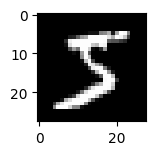

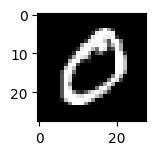

In [5]:
for i in range(2):  
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train_images[i], cmap=plt.get_cmap('gray'))
    plt.show()

In [6]:
#target model architecture, basic CNN architecture 

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape = (28,28,1) ),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu', input_shape = (28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation= 'softmax')
    ])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)               

In [7]:
model.compile(optimizer = 'rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(x_train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5


938/938 [==============================] - 4s 4ms/step - loss: 0.1737 - accuracy: 0.9462
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0511 - accuracy: 0.9840
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0345 - accuracy: 0.9897
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0266 - accuracy: 0.9914
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0213 - accuracy: 0.9932


In [9]:
model.evaluate(x_test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.0332 - accuracy: 0.9902


[0.033231064677238464, 0.9901999831199646]

In [11]:
model.save('teacher_model.h5')

C:\Users\hanki\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
